In [1]:
######################################################
### Attaching and downloading necessary packagaes ####
######################################################
# if (!requireNamespace("BiocManager", quietly = FALSE))
#     install.packages("BiocManager")
# BiocManager::version()
# library("devtools")
# devtools::install_github("broadinstitute/infercnv", force=TRUE)
# detach("package:infercnv", unload=T)  ### package infercnv_1.15.3  seems to work fine
library(infercnv)
#### loading packages and others 
library("Seurat")
library("tidyverse")
#remotes::install_github("mojaveazure/seurat-disk")
library("SeuratDisk")
#install.packages("ggplot2")
library(ggplot2)
#install.packages("remotes")
#remotes::install_github("chris-mcginnis-ucsf/DoubletFinder", force=TRUE)
library(DoubletFinder)
library(dplyr)
library(tidyverse)
#BiocManager::install("clusterProfiler")
library(clusterProfiler)
#BiocManager::install("org.Hs.eg.db")
library(org.Hs.eg.db)
library(fgsea)
library(dplyr)
library(ggplot2)
#install.packages("remotes")
#remotes::install_github("immunogenomics/presto")
library(presto)

Attaching SeuratObject

-- Attaching core tidyverse packages ---------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.1     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"The following features are not present in the object: MLF1IP, not searching for symbol synonyms"
Regressing out CC.Difference

Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
"The following 1 features requested have not been scaled (running reduction without them): MLF1IP"
Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."
PC_ 1 
Positive:  CTCF, G2E3, POLA1, BLM, E2F8, CKAP5, TIPIN, RANGAP1, LBR, NCAPD2 
	   CASP8AP2, CDCA7, MCM6, TTK, CKS2, KIF11, RAD51, ANLN, UBR7, AURKA 
	   CBX5, WDR76, BRIP1, KIF20B, DTL, PRIM1, CENPE, ANP32E, RFC2, CDC25C 
Negative:  TYMS, TOP2A, TPX2, RAD51AP1, NUSAP1, UBE2C, FEN1, CDK1, BIRC5, NDC80 
	   GMNN, CDC20, CLSPN, DLGAP5, USP1, SMC4, DSCC1, PCNA, AURKB, GTSE1 
	   CKS1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 681
Number of edges: 21640

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7285
Number of communities: 6
Elapsed time: 0 seconds


09:39:09 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

09:39:09 Read 681 rows and found 20 numeric columns

09:39:09 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

09:39:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:39:09 Writing NN index file to temp file /lscratch/2033575/RtmpyESRFk/file2cc25ae1e9be

09:39:09 Searching Annoy index using 1 thread, search_k = 3000

09:39:09 Annoy recall = 100%

09:39:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

09:39:11 Initializing from normalized L

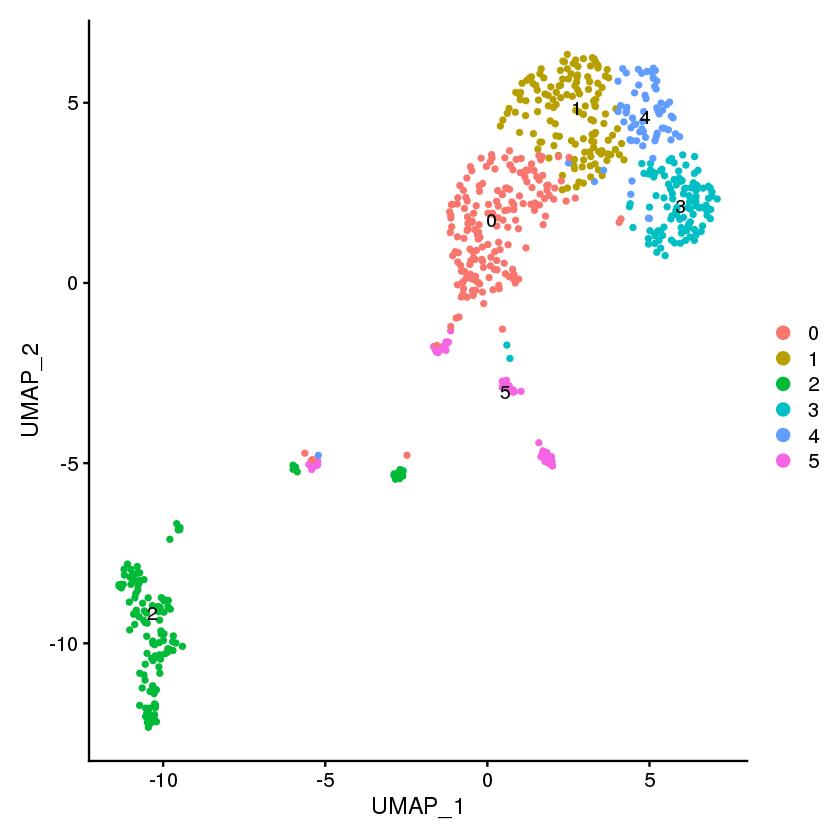

In [4]:
## Step 1 . Read a scRNA file 
dat <- Read10X_h5("/data/kumarr9/scRNA/RU1144_HTAN_MSK.h5")
dat_seurat_obj <- CreateSeuratObject(counts = dat, min.cells = 3, min.features = 200, project = 'SCLC')
dat_seurat_obj[["percent.mt"]] <- PercentageFeatureSet(dat_seurat_obj, pattern = "^MT-")
dat_seurat_obj_filtered <- subset(dat_seurat_obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
dat_seurat_obj_filtered <- NormalizeData(dat_seurat_obj_filtered)
dat_seurat_obj_filtered <- FindVariableFeatures(dat_seurat_obj_filtered, selection.method = "vst")
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
dat_seurat_obj_filtered <- CellCycleScoring(dat_seurat_obj_filtered, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
dat_seurat_obj_filtered$CC.Difference <- dat_seurat_obj_filtered$S.Score - dat_seurat_obj_filtered$G2M.Score
dat_seurat_obj_filtered <- ScaleData(dat_seurat_obj_filtered, vars.to.regress = "CC.Difference", features = rownames(dat_seurat_obj_filtered))
dat_seurat_obj_filtered <- RunPCA(dat_seurat_obj_filtered, features = c(s.genes, g2m.genes))
dat_seurat_obj_filtered <- RunPCA(object = dat_seurat_obj_filtered)
dat_seurat_obj_filtered <- FindNeighbors(dat_seurat_obj_filtered, dims = 1:20) 
dat_seurat_obj_filtered <- FindClusters(dat_seurat_obj_filtered, resolution = 0.9)
dat_seurat_obj_filtered <- RunUMAP(dat_seurat_obj_filtered, dims = 1:20)
DimPlot(dat_seurat_obj_filtered, reduction = "umap", label = TRUE)


[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
NULL
[1] "Creating 227 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,S.Score,G2M.Score,Phase,old.ident,CC.Difference,RNA_snn_res.0.9,seurat_clusters,pANN_0.25_0.05_42,DF.classifications_0.25_0.05_42
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>
RU1144_T_227844233510317,RU1144,14871.148,1616,0,0.190064878,-0.24318853,S,RU1144,0.433253404,4,4,0.08888889,Singlet
RU1144_T_166264153459955,RU1144,5297.613,482,0,0.168959057,-0.17251083,S,RU1144,0.341469889,0,0,0.00000000,Singlet
RU1144_T_232301316992285,RU1144,12233.810,1278,0,-0.093531604,0.87904264,G2M,RU1144,-0.972574243,0,0,0.28888889,Singlet
RU1144_T_204359601969502,RU1144,8473.632,833,0,-0.161858778,-0.17985045,G1,RU1144,0.017991674,2,2,0.04444444,Singlet
RU1144_T_161340108228917,RU1144,17487.508,1970,0,-0.152585990,-0.23727914,G1,RU1144,0.084693148,3,3,0.04444444,Singlet
RU1144_T_170198343989037,RU1144,16270.638,1809,0,0.260025074,-0.19831615,S,RU1144,0.458341220,1,1,0.31111111,Doublet
RU1144_T_161864242837341,RU1144,18508.477,2112,0,-0.204836324,-0.19906264,G1,RU1144,-0.005773686,2,2,0.17777778,Singlet
RU1144_T_131089728714678,RU1144,15778.062,1747,0,-0.216719017,-0.25849028,G1,RU1144,0.041771261,3,3,0.15555556,Singlet
RU1144_T_197135439412652,RU1144,10835.722,1118,0,-0.146985133,-0.02195426,G1,RU1144,-0.125030869,2,2,0.04444444,Singlet


[1] "orig.ident"                      "nCount_RNA"                     
 [3] "nFeature_RNA"                    "percent.mt"                     
 [5] "S.Score"                         "G2M.Score"                      
 [7] "Phase"                           "old.ident"                      
 [9] "CC.Difference"                   "RNA_snn_res.0.9"                
[11] "seurat_clusters"                 "pANN_0.25_0.05_42"              
[13] "DF.classifications_0.25_0.05_42"

[1] 52

[1] 42

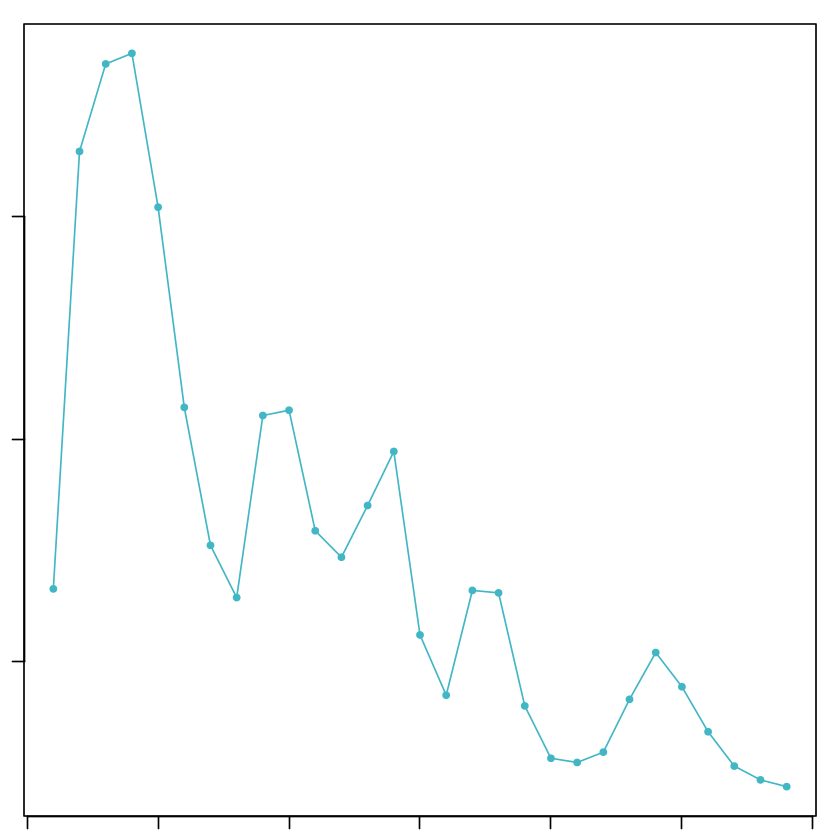

In [5]:
## step 13. Doublet Finding
sweep.list_SCAF3163 <- paramSweep_v3(dat_seurat_obj_filtered, PCs =1:20, sct=FALSE)
sweep.stats_SCAF3163 <- summarizeSweep(sweep.list_SCAF3163, GT = FALSE)
bcmvn_SCAF3163 <- find.pK(sweep.stats_SCAF3163)

### storing the highest pk value to a pk variable
pK <- bcmvn_SCAF3163 %>%
      filter(BCmetric == max(BCmetric)) %>%
      select(pK)
pK <- as.numeric(as.character(pK[[1]]))


### Homotypic doublet proprotion estimation
annotations <- dat_seurat_obj_filtered@meta.data$seurat_clusters
homotypic.prop <- modelHomotypic(annotations)
nExp_poi <- round(0.076*nrow(dat_seurat_obj_filtered@meta.data))
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))


#### run Doubletfinder 
dat_seurat_obj_filtered <- doubletFinder_v3(dat_seurat_obj_filtered, PCs = 1:20, pN = 0.25, pK = pK, nExp = nExp_poi.adj, reuse.pANN = FALSE, sct = FALSE)
## Viewing data frame 
View(dat_seurat_obj_filtered@meta.data)
# before plotting we need to see following items in our data
names(dat_seurat_obj_filtered@meta.data)
# from there we got the DF.classification, which we need for plot
# homotypic.prop
nExp_poi ## number of expected doublets
nExp_poi.adj ## number of actual doublets

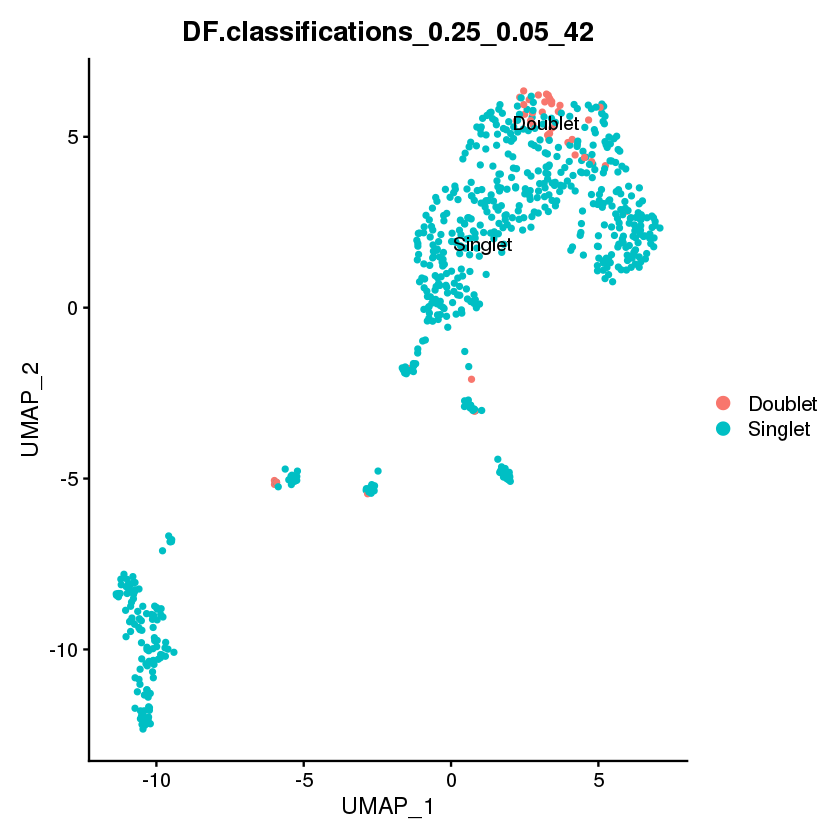

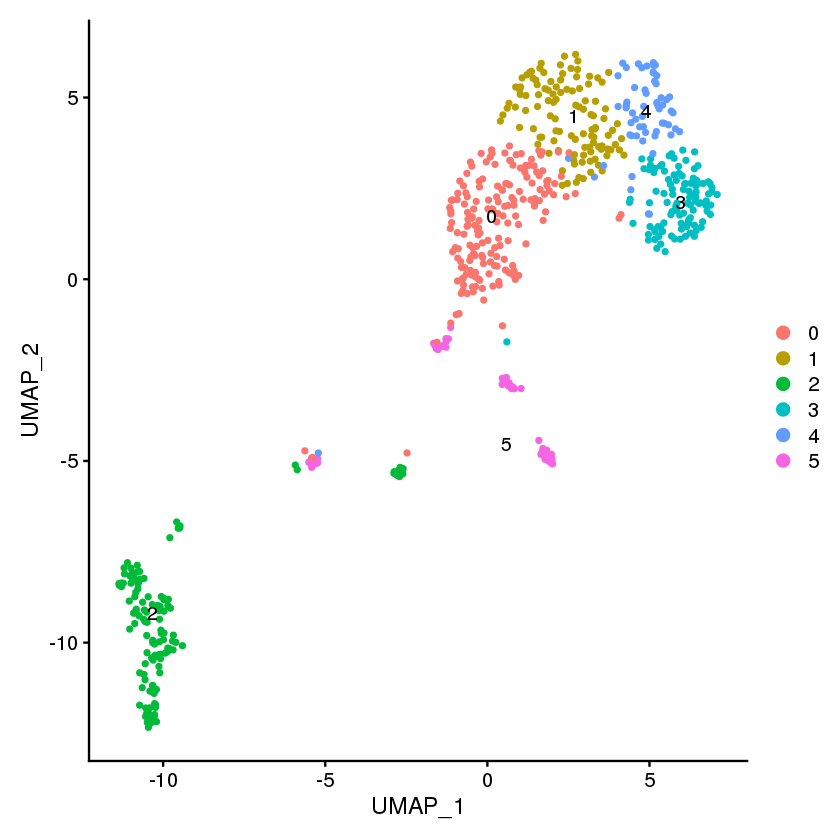

In [6]:
### visulaize the doublets 
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1293A/alternate/doublets.jpg", width = 3000, height = 2000, res=300)
DimPlot(dat_seurat_obj_filtered, reduction = "umap", label = TRUE, group.by = "DF.classifications_0.25_0.05_42")
#dev.off()

## Step 13. Doublets removal
#since we have the name doublets in one of our meta data column of a "dat_seurat_obj_filtered@meta_data", this column has singlet and doublet information
#we can only select singlet by specifying values and so
#Link --- https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/seurat/seurat_01_qc.html
#data.filt = data.filt[, data.filt@meta.data[, DF.name] == "Singlet"]
data.filt = dat_seurat_obj_filtered[, dat_seurat_obj_filtered@meta.data[, "DF.classifications_0.25_0.05_42"] == "Singlet"]
#dim(data.filt)

### ploting the doublet removed dataset for PC & UMAP
#png("/data/kumarr9/scRNA/scRNA_results/SCAF3163/UMAP_doublets_removed.jpg", width = 3000, height = 2000, res=300)
#DimPlot(data.filt, reduction = "umap", label = TRUE, group.by = "DF.classifications_0.25_0.01_287")
#dev.off()


### plotting the doublet removed dataset with cluster info 
#png("/data/kumarr9/scRNA/scRNA_results/cell_cycle_regress_out/RU1293A/alternate/without_doublets.jpg", width = 3000, height = 2000, res=300)
DimPlot(data.filt, reduction = "umap", label = TRUE)
#dev.off()

In [8]:
str(data.filt)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:694537] 7 9 10 21 60 64 165 185 197 246 ...
  .. .. .. .. .. ..@ p       : int [1:640] 0 1616 2098 3376 4209 6179 8291 10038 11156 12093 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 16673 639
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:16673] "A1BG" "A2M" "A4GALT" "AAAS" ...
  .. .. .. .. .. .. ..$ : chr [1:639] "RU1144_T_227844233510317" "RU1144_T_166264153459955" "RU1144_T_232301316992285" "RU1144_T_204359601969502" ...
  .. .. .. .. .. ..@ x       : num [1:694537] 8.96 9.57 9.57 9.57 8.96 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:694537] 7 9 10 21 60 6

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(top100$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"6.06% of input gene IDs are fail to map..."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


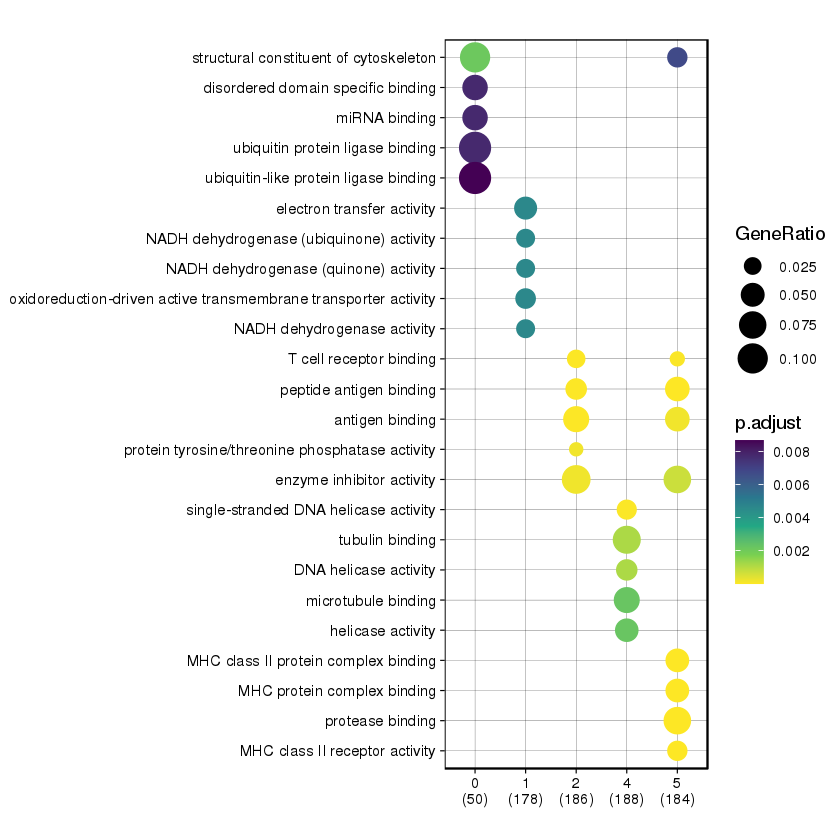

In [80]:
### cluster_profiler analysis/plot starts from here 
# load libraries
library(clusterProfiler)
library(org.Hs.eg.db)
################
logFCfilter=0.5 ## define cutoff
adjPvalFilter=0.05
Cells.markers <- FindAllMarkers(data.filt, # the Seurat obejct
only.pos = TRUE,
min.pct = 0.25,
logfc.threshold = logFCfilter)
################
Cells.markers %>%
  group_by(cluster) %>%
  top_n(n = 200, wt = abs(avg_log2FC)) -> top100
top100$cluster <- factor(top100$cluster, levels = c("0", "1", "2", "3", "4", "5")) ## change this to for number of clusters
eg = bitr(top100$gene, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")
top100 <- merge(top100, eg, by.x = "gene", by.y = "SYMBOL")
#################
cpr <- compareCluster(ENTREZID ~ cluster,
                      data = top100,
                      fun = "enrichGO",
                      OrgDb="org.Hs.eg.db"
)

## plot the result for clusterprofiler ####
dotplot(cpr, label_format = 100)+xlab("")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))+
  scale_color_viridis_c(option = "viridis", begin = 1, end = 0)+ ### change "viridis" to either "magma" or so link - https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html
  theme_linedraw()

In [44]:
##Hallmark gene set analysis within clusters ###
library(msigdbr)
msigdbr_show_species()
### retrieving only human datasets ###
#Molecular Signatures Database is a collection of annotated gene sets. It contains 8 major collections:

# H: hallmark gene sets
# C1: positional gene sets
# C2: curated gene sets
# C3: motif gene sets
# C4: computational gene sets
# C5: GO gene sets
# C6: oncogenic signatures
# C7: immunologic signatures



Warning message:
"'msigdbr_show_species' is deprecated.
Use 'msigdbr_species' instead.
See help("Deprecated")"


[1] "Anolis carolinensis"             "Bos taurus"                     
 [3] "Caenorhabditis elegans"          "Canis lupus familiaris"         
 [5] "Danio rerio"                     "Drosophila melanogaster"        
 [7] "Equus caballus"                  "Felis catus"                    
 [9] "Gallus gallus"                   "Homo sapiens"                   
[11] "Macaca mulatta"                  "Monodelphis domestica"          
[13] "Mus musculus"                    "Ornithorhynchus anatinus"       
[15] "Pan troglodytes"                 "Rattus norvegicus"              
[17] "Saccharomyces cerevisiae"        "Schizosaccharomyces pombe 972h-"
[19] "Sus scrofa"                      "Xenopus tropicalis"

gs_cat,gs_subcat,gs_name,gene_symbol,entrez_gene,ensembl_gene,human_gene_symbol,human_entrez_gene,human_ensembl_gene,gs_id,gs_pmid,gs_geoid,gs_exact_source,gs_url,gs_description
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C3,MIR:MIR_Legacy,AAACCAC_MIR140,ABCC4,10257,ENSG00000125257,ABCC4,10257,ENSG00000125257,M12609,,,,,"Genes having at least one occurence of the motif AAACCAC in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-140 (v7.1 miRBase)."
C3,MIR:MIR_Legacy,AAACCAC_MIR140,ABRAXAS2,23172,ENSG00000165660,ABRAXAS2,23172,ENSG00000165660,M12609,,,,,"Genes having at least one occurence of the motif AAACCAC in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-140 (v7.1 miRBase)."
C3,MIR:MIR_Legacy,AAACCAC_MIR140,ACTN4,81,ENSG00000130402,ACTN4,81,ENSG00000130402,M12609,,,,,"Genes having at least one occurence of the motif AAACCAC in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-140 (v7.1 miRBase)."
C3,MIR:MIR_Legacy,AAACCAC_MIR140,ACTN4,81,ENSG00000282844,ACTN4,81,ENSG00000282844,M12609,,,,,"Genes having at least one occurence of the motif AAACCAC in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-140 (v7.1 miRBase)."
C3,MIR:MIR_Legacy,AAACCAC_MIR140,ACVR1,90,ENSG00000115170,ACVR1,90,ENSG00000115170,M12609,,,,,"Genes having at least one occurence of the motif AAACCAC in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-140 (v7.1 miRBase)."
C3,MIR:MIR_Legacy,AAACCAC_MIR140,ADAM9,8754,ENSG00000168615,ADAM9,8754,ENSG00000168615,M12609,,,,,"Genes having at least one occurence of the motif AAACCAC in their 3' untranslated region. The motif represents putative target (that is, seed match) of human mature miRNA hsa-miR-140 (v7.1 miRBase)."


In [82]:
cp.t2g <- clusterProfiler::read.gmt("/data/kumarr9/h.all.v2022.1.Hs.symbols.gmt")
#trying running for the enrichment analysis like before:
cpr_hall <- compareCluster(gene ~ cluster,
                      data = top100,
                      fun = "enricher",
                      TERM2GENE = cp.t2g,
                      minGSSize = 0,
                      maxGSSize = 5000)

## plot the result for clusterprofiler ####
# dotplot(cpr_hall, label_format = 100)+xlab("")+
#   theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))+
#   scale_color_viridis_c(option = "viridis", begin = 1, end = 0)+ ### change "viridis" to either "magma" or so link - https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html
#   theme_linedraw()

In [83]:
head(cpr_hall)

,Cluster,cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,1,1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,32/108,200/4384,1.452522e-18,5.374330e-17,4.586911e-17,ACP1/APEX1/CCT5/CDK4/COPS5/DUT/GLO1/HDAC2/HDGF/HNRNPA3/HNRNPD/ILF2/MCM7/NHP2/NME1/PCNA/POLD2/PSMA4/PSMB2/PSMD3/RANBP1/RRM1/SNRPD1/SNRPD3/SNRPG/TFDP1/TRIM28/TXNL4A/TYMS/USP1/VBP1/YWHAE,32
2,1,1,HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,19/108,200/4384,2.608962e-07,4.826579e-06,4.119413e-06,ASF1B/CDK4/CDKN2A/CDKN2C/CENPM/CKS1B/DUT/HMGB3/HNRNPD/MCM7/NME1/PCNA/POLD2/RANBP1/RNASEH2A/TOP2A/TUBG1/UNG/USP1,19
3,1,1,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,14/108,200/4384,3.357480e-04,4.140892e-03,3.534189e-03,CBX1/CDK4/CDKN2C/CKS1B/DTYMK/HMGB3/HNRNPD/NUSAP1/PBK/SMC2/SNRPD1/TFDP1/TOP2A/UBE2C,14
4,1,1,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,13/108,200/4384,1.118124e-03,1.034265e-02,8.827297e-03,ACAA2/COX17/CYB5A/HSD17B10/IDH2/NDUFA5/NDUFA6/NDUFA7/NDUFA8/NDUFS8/TIMM10/TIMM13/TIMM8B,13
5,1,1,HALLMARK_DNA_REPAIR,HALLMARK_DNA_REPAIR,10/108,150/4384,3.548888e-03,2.626177e-02,2.241403e-02,COX17/DGUOK/DUT/NELFE/NME1/PCNA/POLR2G/SAC3D1/TYMS/ZWINT,10
6,2,2,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,30/107,200/4384,1.069681e-16,4.385694e-15,3.265343e-15,CCL4/CCL5/CCND3/CD2/CD247/CD3D/CD3E/CD3G/CD7/CD8A/CD96/ETS1/GBP2/GZMA/GZMB/HCLS1/HLA-A/HLA-E/HLA-G/IL2RG/LCK/LCP2/LTB/PRF1/PTPRC/SOCS1/SRGN/TAPBP/TGFB1/WAS,30


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


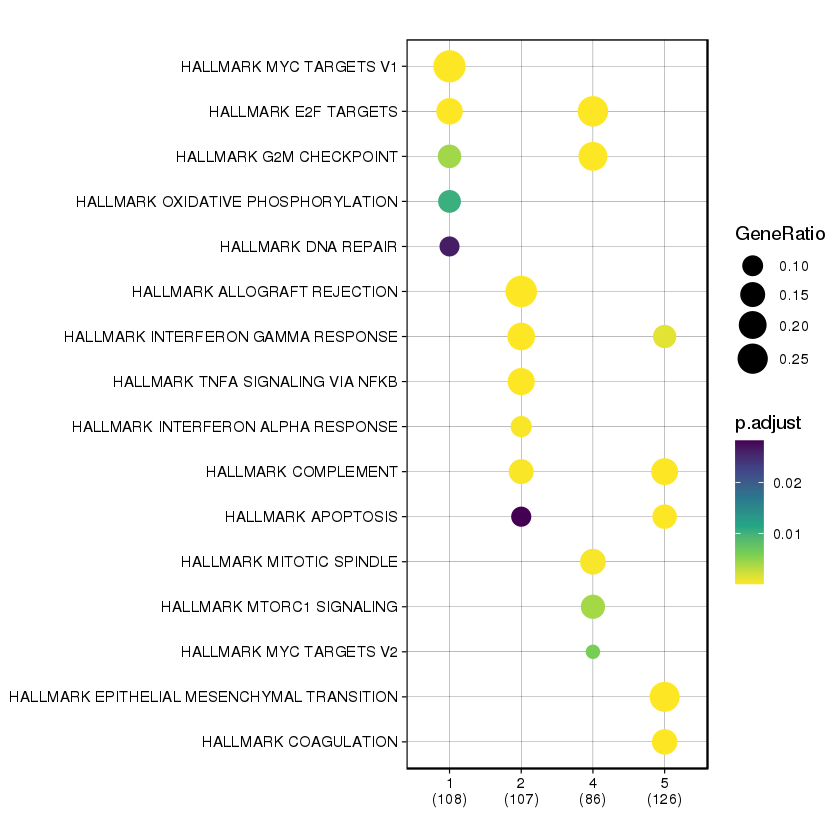

In [84]:
## plot the result for clusterprofiler ####
dotplot(cpr_hall, label_format = 100)+xlab("")+
   theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))+
   scale_color_viridis_c(option = "viridis", begin = 1, end = 0)+ ### change "viridis" to either "magma" or so link - https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html
   theme_linedraw()